# Project 3

### Scientific Question: Is it possible that birds have adapted to live at different altitudes due to differences in hypoxia tolerance genes, such as METTL8?

METTL8 

### Scientific Hypothesis: If METTL8's regulation of MEF2C affects muscle hypoxia resistance, there will be a significant difference between the similarity of METTL8 sequences between different species of birds.

For this analysis, we will be using the highest documented flight for each species.

Mallard ducks can fly up to 21,000 feet.
Helmeted guineafowls: 9800 feet
Crane: 33,000 feet

### Part 1: Load the Packages

Package Definitions:
Pandas:
Numpy:
Scipy:
matplotlib:
Seaborn: linear regression

In [6]:
# Import all packages needed
import pandas as pd
import numpy as np
import scipy as scip
import matplotlib.pyplot as plt
import Bio
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq
from Bio import AlignIO
from Bio import Align
import seaborn as sns

### Part 2: Load in the Data and perform Bioinformatics Analyses

In [46]:
# Read in mRNA sequences of METTL8 gene
#mallard_DNA_df = pd.read_csv("")
mallard_seq = Seq("ATTTC")
guinea_seq = Seq("ACT")
crane_seq = Seq("AGA")

# Get a list of the global alignments between the two sequences
#alignment = AlignIO.read(open(), "stockholm")
#align_array = np.array([list(rec) for rec in alignment, np.character])
alignments = pairwise2.align.globalxx(mallard_seq, guinea_seq)

# Create PairwiseAligner object
#aligner = Align.PairwiseAligner()
# Initialize match scores list
match_scores = []
# Calculate alignment score
mal_gui_score = aligner.score(mallard_seq, guinea_seq)
match_scores.append(mal_gui_score)

match_scores.append(1.0)
match_scores.append(0.0)

np_match = np.array(match_scores)

print(match_scores)

[2.0, 1.0, 0.0]


### Part 3: Create a scatterplot showing the difference in flying altitudes vs match scores between the mRNA sequences of different species

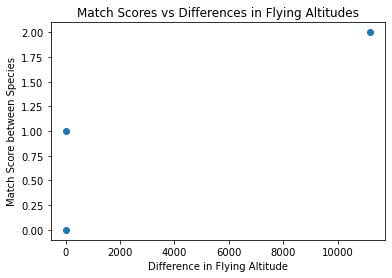

In [49]:
# Calculate differences in flying altitudes
altitude_diff = []
mal_gui_diff = 21000 - 9800
altitude_diff.append(mal_gui_diff)

altitude_diff.append(10)
altitude_diff.append(15)


np_altitude = np.array(altitude_diff)

# Combine data into a numpy array
#diff_dict = {}
#for i in range(3) :
    
   # diff_dict[altitude_diff[i]] = match_scores[i]

# Plot differences in flying altitudes against the match scores
plt.scatter(altitude_diff, match_scores)
# Plot linear regression
b, m = np.polyfit(np_altitude, np_match, 1)
#print(type(altitude_diff))
#plt.plot(altitude_diff, m * altitude_diff + b)
#sns.regplot()

# Customize the plot
plt.title("Match Scores vs Differences in Flying Altitudes")
plt.xlabel("Difference in Flying Altitude")
plt.ylabel("Match Score between Species")
# colors

# Show the plot
plt.show()

### Part 4: Analysis of the results

expected vs program found
not in line? why?

Expected to see a positive correlation

There also may be other factors that could be responsible for the differences in the DNA sequences. Thus, this is not an accurate